<a href="https://colab.research.google.com/github/dipayandas97/Keras_Notebook/blob/master/CNN_AutoEncoder_MNIST_2D_LS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt

In [0]:
encoding_dim = 2

input_img = Input(shape=(28,28,1))

x = Conv2D(16, (3,3), activation = 'relu', padding = 'same')(input_img)
x = MaxPooling2D((2,2), padding = 'same')(x) #14
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x) #7
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x) #4
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x) #2

# at this point the representation is (2, 2, 8) i.e. 128-dimensional

x = Conv2D(8, (2, 2), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x) #4
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x) # 8

x = MaxPooling2D((2,2), strides = 1, padding = 'same')(x) # 7

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x) #14
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x) #28
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



In [0]:
encoder = Model(input_img, encoded)

In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [14]:

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 93s 2ms/step - loss: 0.2687 - val_loss: 0.2399
Epoch 2/50
60000/60000 [==============================] - 92s 2ms/step - loss: 0.2116 - val_loss: 0.1981
Epoch 3/50
60000/60000 [==============================] - 88s 1ms/step - loss: 0.1953 - val_loss: 0.1827
Epoch 4/50
60000/60000 [==============================] - 92s 2ms/step - loss: 0.1847 - val_loss: 0.1771
Epoch 5/50
60000/60000 [==============================] - 92s 2ms/step - loss: 0.1781 - val_loss: 0.1759
Epoch 6/50
60000/60000 [==============================] - 90s 2ms/step - loss: 0.1752 - val_loss: 0.1716
Epoch 7/50
60000/60000 [==============================] - 93s 2ms/step - loss: 0.1722 - val_loss: 0.1668
Epoch 8/50
60000/60000 [==============================] - 93s 2ms/step - loss: 0.1706 - val_loss: 0.1788
Epoch 9/50
60000/60000 [==============================] - 92s 2ms/step - loss: 0.1697 - val_loss: 0.1679
Epoch

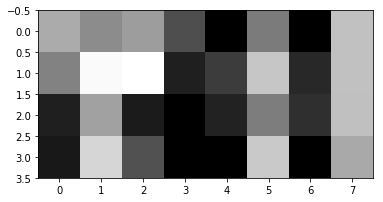

In [17]:
encoded_vector = encoder.predict(x_test)

plt.imshow(encoded_vector[2000].reshape(4,8))
plt.gray()
plt.show()

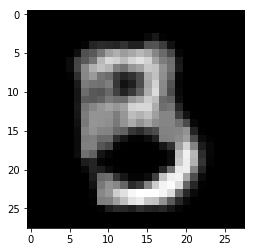

In [19]:
predictions = autoencoder.predict(x_test)

plt.imshow(predictions[5000].reshape(28,28))
plt.gray()
plt.show()